# Summer Olympics Post WWII - 2012 Sport: Gymnastics

Question: Which country has won the most medals overall in the Summer Olympics sport of Gymnastics in regards to the events of Floor Exercises, Individual All Around and the Vault, where men and women were equally represented.

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [13]:
import pandas as pd

#load summer_full data
summer_full_data = pd.read_csv('summer_full.csv')
#load dictionary_data
dictionary_data = pd.read_csv('dictionary.csv', usecols=['Code', 'Country'])
#create a dictionary to map country codes to country names
country_mapping = dict(zip(dictionary_data['Code'], dictionary_data['Country']))
#add a new column to the summer_full data with country names
summer_full_data['Country Name'] = summer_full_data['Country'].map(country_mapping)

#replace missing country names with known values

known_country_names = {
    'URS': 'USSR-Prior 1992',
    'TCH': 'Czechoslovakia- Prior 1992',
    'ROU': 'Romania',
    'GDR': 'East Germany-Prior 1992',
    'EUN': 'Europe Unified Team',
    'FRG': 'Germany- Prior 1990',
    'EUA': 'Austria- pre AUT',
    'ZZX': 'Unknown',
    'ANZ': 'Australia-New Zealand',
    'BOH': 'Bohemia',
    'RU1': 'Russia',
    'YUG': 'Yugoslavia',
}

for index, row in summer_full_data.iterrows():
    country_code = row['Country']
    if pd.isna(row['Country Name']):
        if country_code in country_mapping:
            summer_full_data.at[index, 'Country Name'] = country_mapping[country_code]
        elif country_code in known_country_names:
            summer_full_data.at[index, 'Country Name'] = known_country_names[country_code]

#save new csv file 
summer_full_data.to_csv('summer_full_data_with_country.csv', index=False)



In [25]:
import pandas as pd

# Load the summer_full data with country names (if not already loaded)
summer_full_data = pd.read_csv('summer_full_data_with_country.csv', encoding='utf-8')

# Filter the data based on the specified criteria
# Date range: Post WWII, 1948-2012
# Sport: Gymnastics
# Events: Vault, Individual All Around, and Floor Exercises
# Gender: Men and Women

# Partial event names to match
gymnastics_events = ['Vault', 'Individual All Around', 'Floor Exercise']

filtered_data = summer_full_data[
    (summer_full_data['Year'] >= 1948) & (summer_full_data['Year'] <= 2012) &
    (summer_full_data['Sport'] == 'Gymnastics') &
    (summer_full_data['Gender'].isin(['Men', 'Women'])) &
    (summer_full_data['Event'].str.contains('|'.join(gymnastics_events)))
]

# Save the filtered data to a CSV file
filtered_data.to_csv('filtered_gymnastics_data.csv', index=False)



In [28]:
#Count the Total Number of Winners in Gymnastics Overall from 1948-2012

filtered_data = pd.read_csv('filtered_gymnastics_data.csv')

medal_winners_count = len(filtered_data['Athlete'].unique())

medal_winners_count

144

# Summary Statistics- Summer Olympics 1948-2012


Top Five Countries with the Most Medals
URS - USSR Prior to 1990,
ROU - Romania,
JPN - Japan,
RUS - Russia (Post 1990),
USA - United States



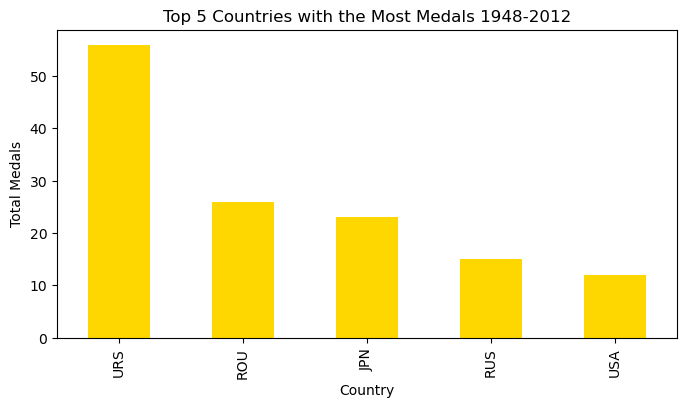

In [93]:
#Top 5 Countries with the most medals

import pandas as pd
import matplotlib.pyplot as plt

filtered_data = pd.read_csv('filtered_gymnastics_data.csv')

country_medal_counts = filtered_data.groupby(['Country', 'Medal'])['Medal'].count().unstack(fill_value=0)
country_medal_counts['Total Medals'] = country_medal_counts.sum(axis=1)

top_5_countries = country_medal_counts.sort_values(by='Total Medals', ascending=False).head(5)
#Bargraph

plt.figure(figsize=(8,4))
top_5_countries['Total Medals'].plot(kind='bar', color='gold')

#set Labels

plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Top 5 Countries with the Most Medals 1948-2012')



plt.show()

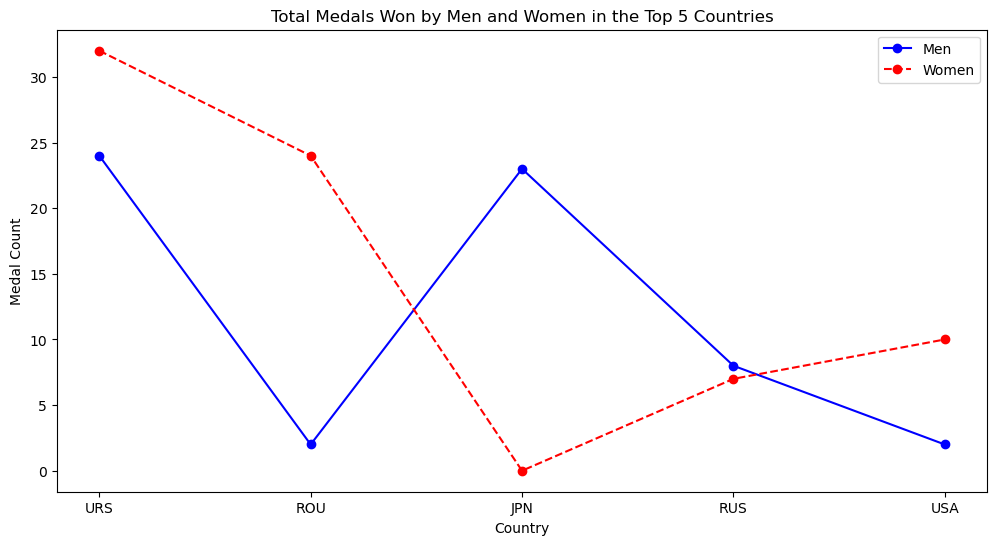

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered gymnastics data (if not already loaded)
filtered_data = pd.read_csv('filtered_gymnastics_data.csv')

# Filter data for the specified countries (JPN, ROU, RUS, URS, USA)
countries_to_analyze = ['URS', 'ROU', 'JPN', 'RUS', 'USA']

# Create lists to store medal counts for men and women
men_medal_counts = []
women_medal_counts = []

# Loop through the specified countries
for country in countries_to_analyze:
    # Filter men data for the current country
    men_data = filtered_data[(filtered_data['Country'] == country) & (filtered_data['Gender'] == 'Men')]
    
    # Filter women data for the current country
    women_data = filtered_data[(filtered_data['Country'] == country) & (filtered_data['Gender'] == 'Women')]
    
    # Count the total number of medals won by men and women for the current country
    men_count = men_data['Medal'].count()
    women_count = women_data['Medal'].count()
    
    # Append the counts to the respective lists
    men_medal_counts.append(men_count)
    women_medal_counts.append(women_count)

# Create a line graph for both men and women medal counts
plt.figure(figsize=(12, 6))

# Plot lines for men (blue)
plt.plot(countries_to_analyze, men_medal_counts, marker='o', color='blue', label='Men')

# Plot lines for women (pink)
plt.plot(countries_to_analyze, women_medal_counts, marker='o', color='red', linestyle='--', label='Women')

# Set labels and title for the line graph
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Total Medals Won by Men and Women in the Top 5 Countries')

# Add legend to the line graph
plt.legend()

# Show the line graph
plt.show()


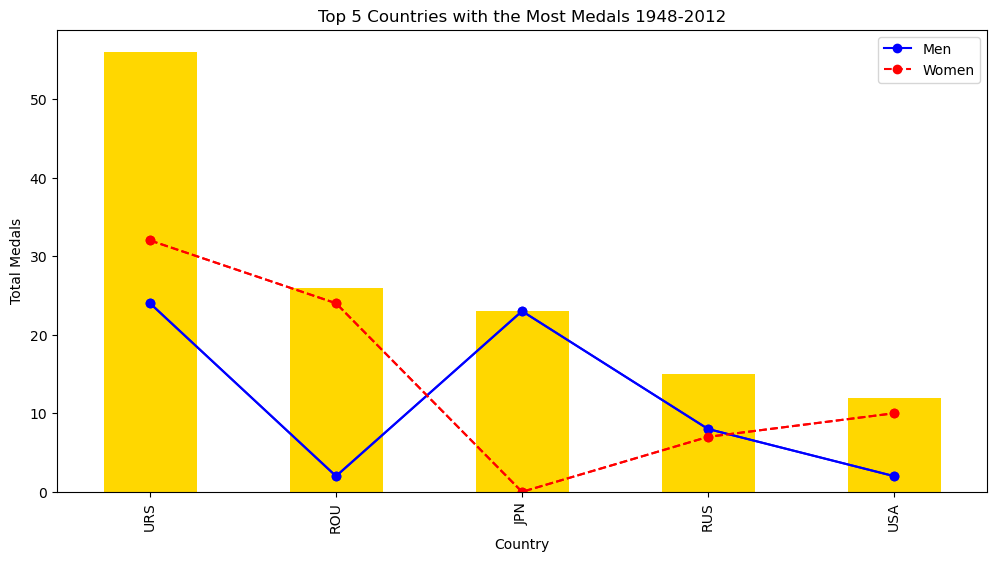

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered gymnastics data (if not already loaded)
filtered_data = pd.read_csv('filtered_gymnastics_data.csv')

# Filter data for the specified countries (JPN, ROU, RUS, URS, USA)
countries_to_analyze = ['URS', 'ROU', 'JPN', 'RUS', 'USA']

# Create lists to store medal counts for men and women
men_medal_counts = []
women_medal_counts = []

# Loop through the specified countries
for country in countries_to_analyze:
    # Filter men data for the current country
    men_data = filtered_data[(filtered_data['Country'] == country) & (filtered_data['Gender'] == 'Men')]
    
    # Filter women data for the current country
    women_data = filtered_data[(filtered_data['Country'] == country) & (filtered_data['Gender'] == 'Women')]
    
    # Count the total number of medals won by men and women for the current country
    men_count = men_data['Medal'].count()
    women_count = women_data['Medal'].count()
    
    # Append the counts to the respective lists
    men_medal_counts.append(men_count)
    women_medal_counts.append(women_count)

# Create a line graph for both men and women medal counts
plt.figure(figsize=(12, 6))

# Plot lines for men (blue)
plt.plot(countries_to_analyze, men_medal_counts, marker='o', color='blue', label='Men')

# Plot lines for women (pink)
plt.plot(countries_to_analyze, women_medal_counts, marker='o', color='red', linestyle='--', label='Women')

# Set labels and title for the line graph
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Total Medals Won by Men and Women (1948-2012) in Selected Countries')

# Add legend to the line graph
plt.legend()



# Load the filtered gymnastics data for the bar graph (if not already loaded)
filtered_data = pd.read_csv('filtered_gymnastics_data.csv')

# Create a bar graph for the top 5 countries with the most medals
country_medal_counts = filtered_data.groupby(['Country', 'Medal'])['Medal'].count().unstack(fill_value=0)
country_medal_counts['Total Medals'] = country_medal_counts.sum(axis=1)
top_5_countries = country_medal_counts.sort_values(by='Total Medals', ascending=False).head(5)

# Create a bar graph for the top 5 countries
ax = top_5_countries['Total Medals'].plot(kind='bar', color='gold')

# Set labels and title for the bar graph
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Top 5 Countries with the Most Medals 1948-2012')

# Overlay the line graph over the bar graph on the same axes
plt.gca().set_prop_cycle(None)  # Reset the color cycle
plt.plot(countries_to_analyze, men_medal_counts, marker='o', color='blue', linestyle='-', label='Men')
plt.plot(countries_to_analyze, women_medal_counts, marker='o', color='red', linestyle='--', label='Women')



# Show the combined graph
plt.show()


# Top Country with the Most Medals

The USSR pre-1990 have won 56 medals overtime. 

In [101]:
import pandas as pd

# Load the filtered gymnastics data
filtered_data = pd.read_csv('filtered_gymnastics_data.csv')

# Calculate the total medals for each country (both men and women)
country_medal_counts = filtered_data.groupby(['Country', 'Medal'])['Medal'].count().unstack(fill_value=0)
country_medal_counts['Total Medals'] = country_medal_counts.sum(axis=1)

# Find the country with the highest total medals
top_country = country_medal_counts['Total Medals'].idxmax()
total_medals = country_medal_counts['Total Medals'].max()

print(f"The country that won the most medals {top_country} with {total_medals} medals.")


The country that won the most medals URS with 56 medals.


In [103]:
# Filter the data for the URS
urs_data = filtered_data[filtered_data['Country'] == 'URS']

# Get the unique years in which URS won medals
urs_years = urs_data['Year'].unique()

# Find the start and end years
start_year = min(urs_years)
end_year = max(urs_years)

# Calculate the total number of medals won by URS
total_medals = urs_data.shape[0]

print(f"The URS won a total of {total_medals} medals combined between men and women in the time frame from {start_year} to {end_year}.")


The URS won a total of 56 medals combined between men and women in the time frame from 1952 to 1988.


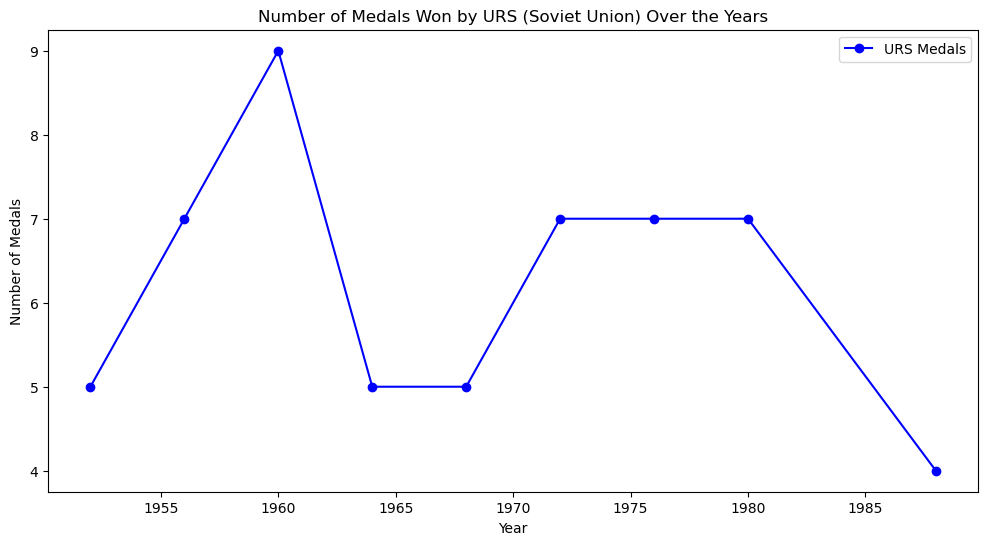

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the URS
urs_data = filtered_data[filtered_data['Country'] == 'URS']

# Group the data by year and count the medals
urs_medal_counts = urs_data.groupby('Year')['Medal'].count()

# Create a timeline-style graph
plt.figure(figsize=(12, 6))
plt.plot(urs_medal_counts.index, urs_medal_counts, marker='o', color='blue', label='URS Medals')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by URS (Soviet Union) Over the Years')
plt.legend()
plt.show()


# A Comparison of the USSR pre-1990 and the USA overall in regards to number of medals

**A Time Analysis between USSR, the USA and Post USSR **

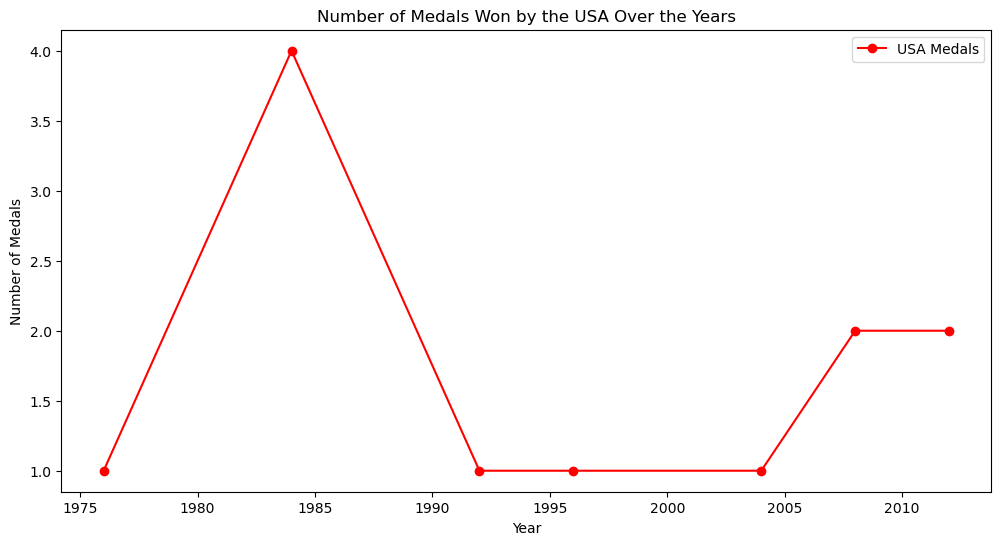

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the USA
usa_data = filtered_data[filtered_data['Country'] == 'USA']

# Group the data by year and count the medals
usa_medal_counts = usa_data.groupby('Year')['Medal'].count()

# Create a timeline-style graph for the USA
plt.figure(figsize=(12, 6))
plt.plot(usa_medal_counts.index, usa_medal_counts, marker='o', color='red', label='USA Medals')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by the USA Over the Years')
plt.legend()
plt.show()


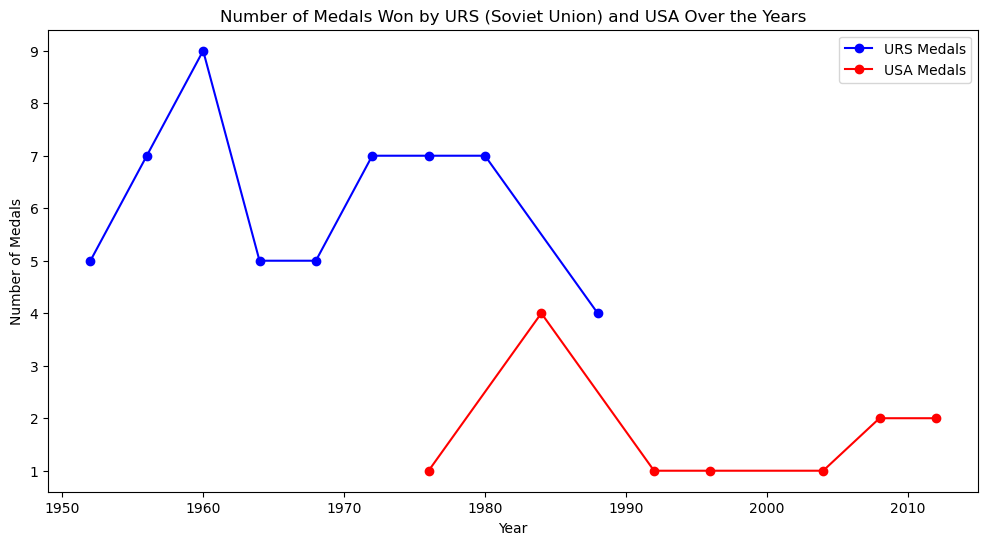

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the URS
urs_data = filtered_data[filtered_data['Country'] == 'URS']

# Filter the data for the USA
usa_data = filtered_data[filtered_data['Country'] == 'USA']

# Group the data by year and count the medals for URS and USA
urs_medal_counts = urs_data.groupby('Year')['Medal'].count()
usa_medal_counts = usa_data.groupby('Year')['Medal'].count()

# Create a timeline-style graph for both URS and USA
plt.figure(figsize=(12, 6))
plt.plot(urs_medal_counts.index, urs_medal_counts, marker='o', color='blue', label='URS Medals')
plt.plot(usa_medal_counts.index, usa_medal_counts, marker='o', color='red', label='USA Medals')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by URS (Soviet Union) and USA Over the Years')
plt.legend()
plt.show()


In [113]:
# Load the filtered gymnastics data
filtered_data = pd.read_csv('filtered_gymnastics_data.csv')

# Filter the data for the post-1990 period
filtered_data_post_1990 = filtered_data[filtered_data['Year'] >= 1990]

# Define the countries you want to analyze
countries_to_analyze = ['RUS', 'UKR', 'BLR', 'UZB', 'KAZ', 'GEO', 'AZE', 'ARM', 'TKM', 'TJK', 'KGZ', 'MDA', 'LTU', 'LAT', 'EST', 'YUG', 'TCH']

# Filter the data for the specified countries
medal_counts = filtered_data_post_1990[filtered_data_post_1990['Country'].isin(countries_to_analyze)]

# Count the total medals for each country
total_medals_by_country = medal_counts.groupby('Country').size().reset_index(name='Total Medals')

# Print the total medal counts
print(total_medals_by_country)


  Country  Total Medals
0     BLR             1
1     LAT             2
2     RUS            15
3     UKR             2


In [121]:
# Create a dictionary to map the countries to the "Post USSR" category
country_to_category = {
    'BLR': 'Post USSR',
    'RUS': 'Post USSR',
    'LAT': 'Post USSR',
    'UKR': 'Post USSR'
}

# Create a new column 'Category' based on the mapping
filtered_data_post_1990.loc[:, 'Category'] = filtered_data_post_1990['Country'].map(country_to_category)



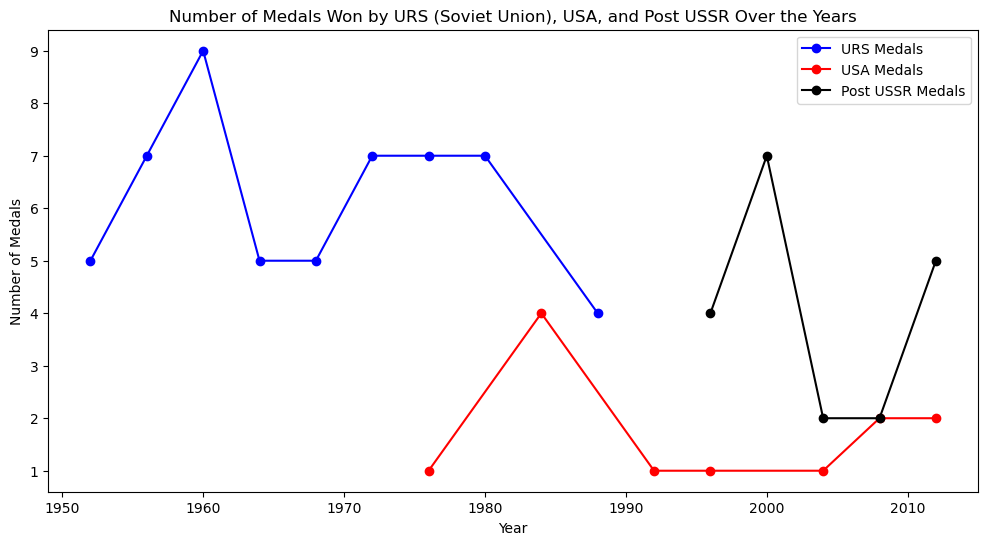

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the URS
urs_data = filtered_data[filtered_data['Country'] == 'URS']

# Filter the data for the USA
usa_data = filtered_data[filtered_data['Country'] == 'USA']

# Filter the data for Post USSR
post_ussr_data = filtered_data_post_1990[filtered_data_post_1990['Category'] == 'Post USSR']

# Group the data by year and count the medals for URS, USA, and Post USSR
urs_medal_counts = urs_data.groupby('Year')['Medal'].count()
usa_medal_counts = usa_data.groupby('Year')['Medal'].count()
post_ussr_medal_counts = post_ussr_data.groupby('Year')['Medal'].count()

# Create a timeline-style graph for URS, USA, and Post USSR
plt.figure(figsize=(12, 6))
plt.plot(urs_medal_counts.index, urs_medal_counts, marker='o', color='blue', label='URS Medals')
plt.plot(usa_medal_counts.index, usa_medal_counts, marker='o', color='red', label='USA Medals')
plt.plot(post_ussr_medal_counts.index, post_ussr_medal_counts, marker='o', color='black', label='Post USSR Medals')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by URS (Soviet Union), USA, and Post USSR Over the Years')
plt.legend()
plt.show()


In [122]:
import pandas as pd

# Load the filtered gymnastics data
filtered_data = pd.read_csv('filtered_gymnastics_data.csv')

# Filter the data for men and women
men_data = filtered_data[filtered_data['Gender'] == 'Men']
women_data = filtered_data[filtered_data['Gender'] == 'Women']

# Group the data by country and count the medals for men and women
most_men_medals = men_data['Country'].value_counts().idxmax()
most_women_medals = women_data['Country'].value_counts().idxmax()

print(f"Country with the most men medal winners: {most_men_medals}")
print(f"Country with the most women medal winners: {most_women_medals}")


Country with the most men medal winners: URS
Country with the most women medal winners: URS


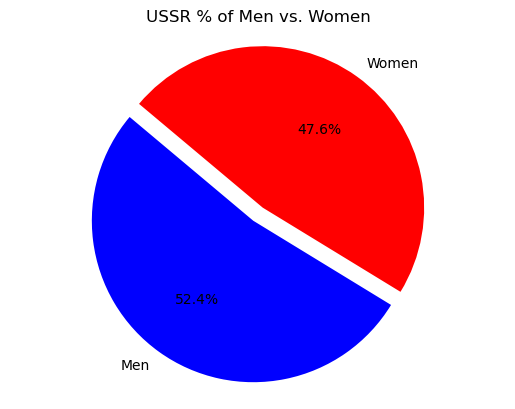

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered gymnastics data
filtered_data = pd.read_csv('filtered_gymnastics_data.csv')

# Filter the data for men and women
men_data = filtered_data[filtered_data['Gender'] == 'Men']
women_data = filtered_data[filtered_data['Gender'] == 'Women']

# Count the number of men and women medal winners
men_count = len(men_data)
women_count = len(women_data)

# Create a pie chart
labels = ['Men', 'Women']
sizes = [men_count, women_count]
colors = ['blue', 'red']
explode = (0.1, 0)  # Explode the "Men" slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('USSR % of Men vs. Women')

plt.show()


From 1948 to 1991 the USSR- Soviet Russia was a powerhouse when it came to the sport of gymnastics especially in the co-ed events of the Vault, the Individual All Around and the Floor exercises. if we were to do a deeper dive, and include all events we would probably see an increase in those medals. I only wanted to look at events that both men and women competed in individually and removed all team events and single gender events. After the fall of the USSR the Soviet Union was broken into their own independent countries and i wanted to see if those coutries would have still contributed to the USSR's success after post 1991. and Russia along with 3 other countries combined brought home an additional 20 medals after 1992. we can further see from the data that the United States did not become more competitive in the sport of gymnastics until after 1978. 